In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

url='/home/gustavolamonica/code/Glamonica123/ET_Predictor/raw_data/scrubbed.csv'
data=pd.read_csv(url)

/tmp/ipykernel_50468/1025452113.py:11: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(url)


In [2]:
def clean_data(value):
    try:
        # Attempt to convert directly
        return float(value)
    except ValueError:
        # Remove non-numeric characters and try conversion
        cleaned_value = ''.join(char for char in value if char.isdigit() or char == '.')
        try:
            return float(cleaned_value)
        except ValueError:
            # If conversion fails, return NaN
            return float('nan')
data['latitude']=data['latitude'].apply(clean_data)
data['duration (seconds)']=data['duration (seconds)'].apply(clean_data)
data=data[data['country']=='us']
data.drop(columns=['date posted', 'comments', 'duration (hours/min)', 'shape','country','state','city'], inplace=True)
data=data[data['duration (seconds)']<=10000]

In [3]:
data.dtypes

datetime               object
duration (seconds)    float64
latitude              float64
longitude             float64
dtype: object

In [4]:
data.head()

,datetime,duration (seconds),latitude,longitude
0,10/10/1949 20:30,2700.0,29.883056,-97.941111
3,10/10/1956 21:00,20.0,28.978333,-96.645833
4,10/10/1960 20:00,900.0,21.418056,-157.803611
5,10/10/1961 19:00,300.0,36.595000,-82.188889
7,10/10/1965 23:45,1200.0,41.117500,-73.408333


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63987 entries, 0 to 80331
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   duration (seconds)  63987 non-null  float64
 1   latitude            63987 non-null  float64
 2   longitude           63987 non-null  float64
 3   year                63987 non-null  float64
 4   hour                63987 non-null  float64
 5   dayofyear_sin       63987 non-null  float64
 6   dayofyear_cos       63987 non-null  float64
 7   month_sin           63987 non-null  float64
 8   month_cos           63987 non-null  float64
 9   day_sin             63987 non-null  float64
 10  day_cos             63987 non-null  float64
 11  dayofweek_sin       63987 non-null  float64
 12  dayofweek_cos       63987 non-null  float64
dtypes: float64(13)
memory usage: 6.8 MB


In [20]:
data.isna().sum()

duration (seconds)    0
latitude              0
longitude             0
year                  0
hour                  0
dayofyear_sin         0
dayofyear_cos         0
month_sin             0
month_cos             0
day_sin               0
day_cos               0
dayofweek_sin         0
dayofweek_cos         0
dtype: int64

In [7]:
def preprocess_datetime(datetime_str):
    date_part, time_part = datetime_str.split()
    hours, minutes = map(int, time_part.split(':'))
    
    # Check if time is irregular (greater than 24 hours)
    if hours >= 24:
        # Calculate extra days and remaining hours
        extra_days, hours = divmod(hours, 24)
        # Add extra days to the date
        next_date = pd.to_datetime(date_part, format='%m/%d/%Y') + pd.Timedelta(days=extra_days)
        # Return the new datetime string
        return next_date.strftime('%m/%d/%Y %H:%M')
    else:
        return datetime_str

# Apply the preprocessing function to the datetime column
data['datetime'] = data['datetime'].apply(preprocess_datetime)

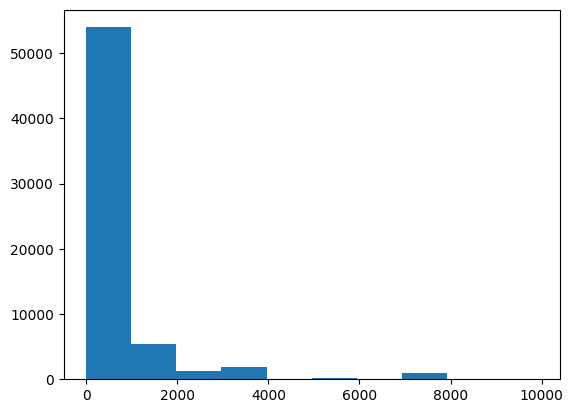

In [8]:
plt.hist(data['duration (seconds)']);

In [9]:
data.to_csv('preprocessing05.csv', index=False)